In [1]:
import fcn
import matplotlib.pyplot as plt
import chainer
import numpy as np
import os.path as osp
from scripts import label2mask as l2m
from PIL import Image

{'img': '/home/dokutagero/repos/dataset_bridge/bridge_dataset/deck_d/0223.jpg', 'lbl': ['deck_d/0223.ie1.xml', 'deck_d/0223.ie2.xml', 'deck_d/0223.ie3.xml'], 'deck': ['deck_d/0223.ie1.xml', 'deck_d/0223.ie2.xml', 'deck_d/0223.ie3.xml']}
3
[0 1 2]
[0 1 2]
[0 1 2]


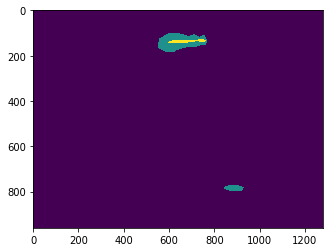

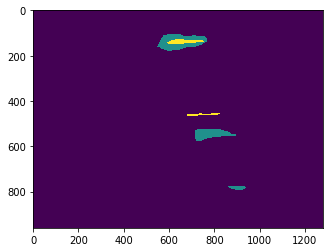

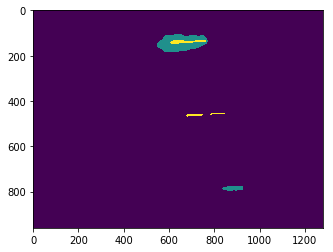

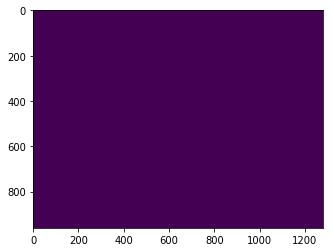

In [8]:
def color_class_label(image):                                                                                                                                
    # https://stackoverflow.com/a/33196320                                                                                                                         
    color_codes = {                                                                                                                                                
        (0, 0, 0): 0,                                                                                                                                              
        (255, 255, 0): 1,                                                                                                                                          
        (255, 0, 0): 2                                                                                                                                             
    }                                                                                                                                                              

    color_map = np.ndarray(shape=(256*256*256), dtype='int32')                                                                                                     
    color_map[:] = -1                                                                                                                                              
    for rgb, idx in color_codes.items():                                                                                                                           
       rgb = rgb[0] * 65536 + rgb[1] * 256 + rgb[2]                                                                                                               
       color_map[rgb] = idx                                                                                                                                       

    image = image.dot(np.array([65536, 256, 1], dtype='int32'))                                                                                                    
    return color_map[image]

root = osp.expanduser('/home/dokutagero/repos/dataset_bridge/bridge_masks_xml')
valid = fcn.datasets.BridgeSeg(split='validation_xml', black_out_non_deck=True)
print(valid.files['validation_xml'][1])
im = Image.open(valid.files['validation_xml'][1]['img'])
lbls = [color_class_label(l2m(osp.join(root, m), im.size)) for m in valid.files['validation_xml'][1]['lbl']]
    
print(len(lbls))
lbls[0].shape
print(np.unique(lbls[0]))
print(np.unique(lbls[1]))
print(np.unique(lbls[2]))
new_lbl = np.zeros(lbls[0].shape)
for c in range(3):
    intersection = np.ones(lbls[0].shape)
    union = np.zeros(lbls[0].shape)
    plt.figure(c)
    plt.imshow(lbls[c])
    for lbl in lbls:
        intersection *= (lbl==c).astype(dtype=np.uint32)
        union += (lbl==c).astype(dtype=np.uint32)
        union = (union>0).astype(dtype=np.uint32)
    # new_lbl[intersection.astype(bool)] = c
    new_lbl[union.astype(bool)] = c
        

new_lbl = np.zeros(lbls[0].shape)
plt.figure(4)
plt.imshow(new_lbl)
plt.show()

In [9]:
len(valid)

10

In [10]:
from fcn import eval_semantic_segmentation as ess

10
10
10


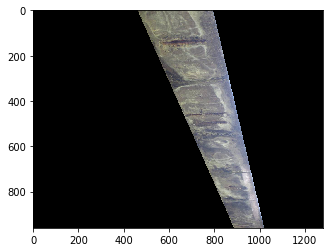

In [11]:
iter_valid = chainer.iterators.SerialIterator(valid, batch_size=1, repeat=False, shuffle=False)
imgs = []
lbls = []
print(len(valid))
for res in iter_valid: 
    imgs.append(res[0][0])
    lbls.append(res[0][1])
        
print(len(lbls))
print(len(imgs))
plt.imshow(imgs[1])
plt.show()




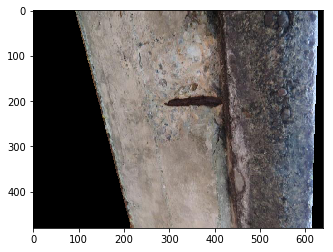

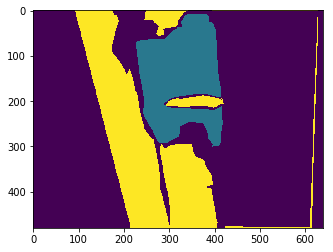

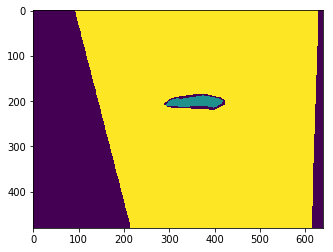

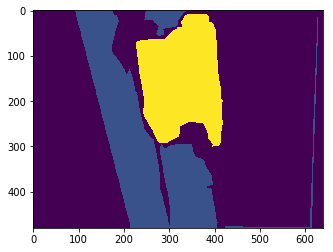

In [9]:
len(imgs)
plt.imshow(imgs[-1])
plt.show()
plt.figure(2)
plt.imshow(lbls[-1][:,:,1])
plt.savefig('0355_delamination.png')
plt.figure(3)
plt.imshow(lbls[-1][:,:,2])
plt.savefig('0355_rebar.png')
plt.figure(4)
plt.imshow(lbls[-1][:,:,0])
plt.savefig('0355_nondamage.png')
plt.show()

In [ ]:
print(len(imgs))
print(len(lbls))

In [ ]:
# fake_preds = []
# for i in range(len(imgs)):
#     fake_preds.append(np.random.randint(3, size=imgs[i][:,:,0].shape, dtype=np.int32))
fake_preds = []
for idx, img in enumerate(imgs):
    fake_pred = idx * np.ones(img[:,:,0].shape)
    fake_preds.append(fake_pred.astype(dtype=np.int32))

print(len(fake_preds))


In [88]:
print(new_lbl.shape)
print(new_lbl)
print(np.unique(new_lbl.astype(dtype=np.uint32)))

print(lbls[1].shape)
print(np.unique(lbls[1].astype(dtype=np.int32)))
print(lbls[1])

(960, 1280)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[0 1 2]
(960, 1280, 3)
[-1  0  1  2  3  4  5]
[[[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  ..., 
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  ..., 
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  ..., 
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 ..., 
 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  ..., 
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  ..., 
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  ..., 
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]]


In [12]:
confusion = ess.eval_semantic_segmentation([new_lbl.astype(dtype=np.int32)], [lbls[1].astype(dtype=np.int32)])
print(confusion)

> /home/dokutagero/repos/fcn/fcn/eval_semantic_segmentation.py(41)calc_semantic_segmentation_confusion()
-> for channel in range(gt_label_mc.shape[-1]):
(Pdb) c
> /home/dokutagero/repos/fcn/fcn/eval_semantic_segmentation.py(41)calc_semantic_segmentation_confusion()
-> for channel in range(gt_label_mc.shape[-1]):
(Pdb) c
> /home/dokutagero/repos/fcn/fcn/eval_semantic_segmentation.py(41)calc_semantic_segmentation_confusion()
-> for channel in range(gt_label_mc.shape[-1]):
(Pdb) c
{'iou': array([ 0.94374644,         nan,         nan]), 'miou': array([ 0.94374644,         nan,         nan])}


/home/dokutagero/repos/fcn/fcn/eval_semantic_segmentation.py:103: RuntimeWarning: invalid value encountered in true_divide
  iou = iou_numerator / iou_denominator


In [17]:
np.nanmean(np.nan_to_num(confusion['iou'])[1:])

0.0

In [15]:
len(lbls)
lbls[0].shape


(768, 1024, 3)